In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from photoholmes.utils.image import read_image

def plot_image(image, title="Image"):
    if isinstance(image, bytes):
        image = np.frombuffer(image, np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="gray" if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

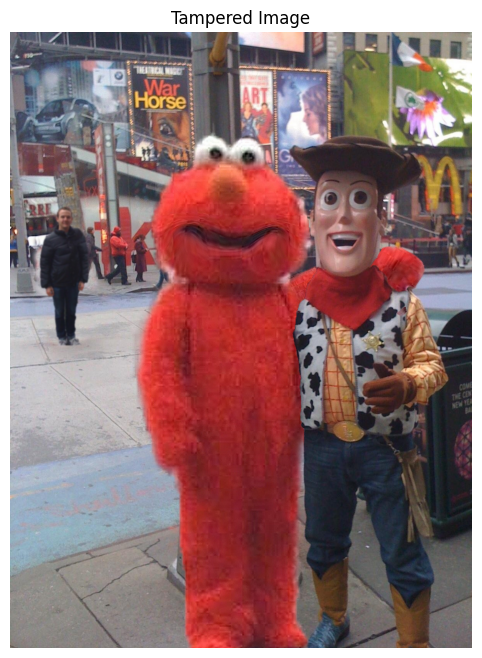

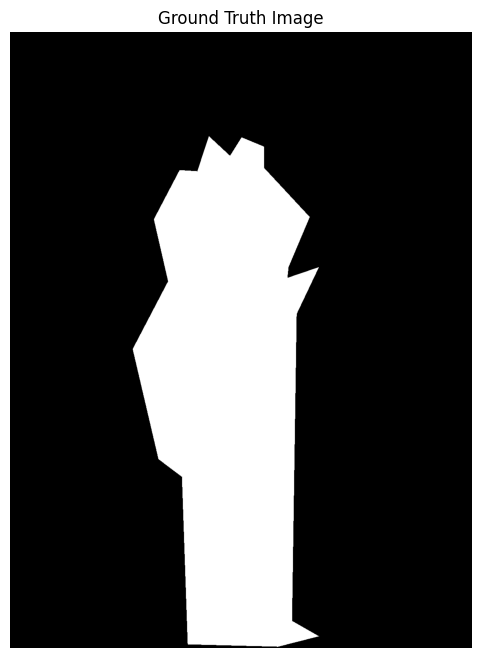

In [3]:
img_folder = "/home/nhat82125/ForgeryX-Server/example"
img_name = "im1_edit3"

tp_img = read_image(os.path.join(img_folder, f"{img_name}.jpg"))
gt_img = read_image(os.path.join(img_folder, f"{img_name}.png"))

plot_image(tp_img.permute(1, 2, 0).numpy(), "Tampered Image")
plot_image(gt_img.permute(1, 2, 0).numpy(), "Ground Truth Image")

In [4]:
from photoholmes.methods.exif_as_language import EXIFAsLanguage, exif_as_language_preprocessing

arch_config = "pretrained"
path_to_weights = "/home/nhat82125/photoholmes/weights/exif_as_language/weights.pth"

method = EXIFAsLanguage(
    arch_config=arch_config,
    weights=path_to_weights,
)

device = "cuda"
method.to_device(device)

image_data = {"image": tp_img}
input = exif_as_language_preprocessing(**image_data)

/home/nhat82125/miniconda3/envs/forgeryx/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import torch

method.net.eval()

with torch.no_grad():
    output = method.predict(**input)

In [6]:
ms, ncuts, score, output_pca, affinity_matrix = output


ms_norm = (ms - np.min(ms)) / (np.max(ms) - np.min(ms))  # Normalize to [0,1]
heatmap = cv2.applyColorMap(np.uint8(255 * ms_norm), cv2.COLORMAP_JET)
# print(score)

cv2.imwrite("exif.png", heatmap)

# plot_image(ncuts, "Localization map")

True

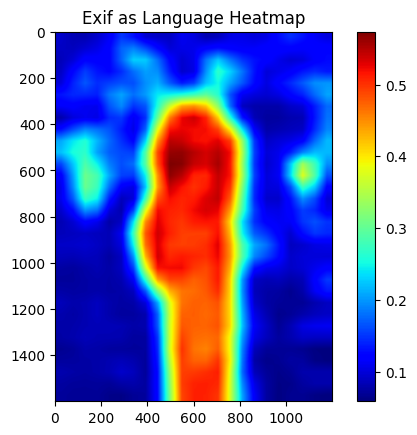

In [8]:
plt.imshow(ms, cmap='jet', interpolation='hamming')
plt.title('Exif as Language Heatmap')
plt.colorbar()